# Data Science and Business Analytics Internship

## GRIP: The Spark Foundation

## Author : Ashlesha Datir.



## Task 1: Prediction using Supervised ML
            (Level - Beginner)
* Predict the percentage of a student based on the no.of study hours.
* This is a simple linear Regression task as just 2 variables.
* Data can be found on http://bit.ly/w-data


* **Q. What will be predicted score if a students studies for 9.25 hr/day ?**


## **Linear Regression with Python Scikit Learn**
Here we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

## **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading data from remote link
import dask
# url ="http://bit.ly/w-data"
w_data = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")
w_data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
w_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
w_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
w_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
w_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Visualizing the data set

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data.

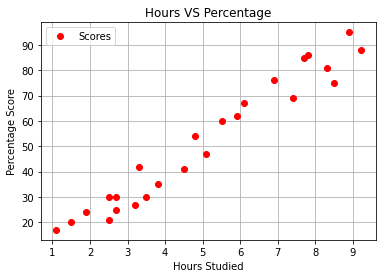

In [7]:
#Plotting the distribution of scores
w_data.plot(x='Hours', y='Scores', style='o',c="red",grid=True)
plt.title('Hours VS Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()


From the above graph, we can clearly see that there is a **positive linear relation** between the number of **hours studied and percentage of score**

In [8]:
import warnings
warnings.filterwarnings('ignore')

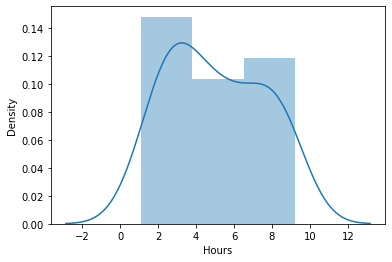

In [9]:
# To Check the norrmality
import seaborn as sns
sns.distplot(w_data['Hours'])
plt.show()

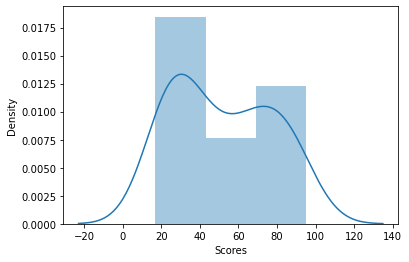

In [10]:
sns.distplot(w_data['Scores'])
plt.show()

## Preparing the data 
The next step is to divide the data into "Attributes" (Inputs) & "lables"(Output)

In [11]:
X = w_data.iloc[:, :-1].values
y = w_data.iloc[:, 1].values

In [12]:
# Split the data into train and test sets
# we will do this by using Scikit-Learn's built-in train_test_split()method
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

## Training the Algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training complete.")

Training complete.


## Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [14]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the score

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [15]:
#Comparing Actual vs Predicted
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**We can check train and test score**

In [16]:
print("Train Score :",regressor.score(X_train, y_train))
print("Test Score :",regressor.score(X_test,y_test))

Train Score : 0.9515510725211552
Test Score : 0.9454906892105356


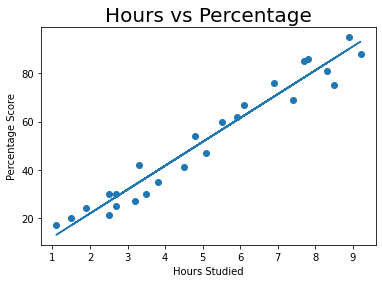

In [17]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

#Plotting for the test data
plt.scatter(X,y)
plt.title('Hours vs Percentage',size=20)  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.plot(X,line);
plt.show()

## **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


**Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.**
You can also predict the marks by giving the input of number of hours studied.
* For example: What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [19]:
# We can also test with your own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538
